# Import Required Libraries
Import the necessary libraries, including Keras, NumPy, Scikit-learn, and Matplotlib.

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd

# Load and Subset the MNIST Dataset
Load the MNIST dataset and create a new subset of the data for each class label.

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create a new subset dataset
subset_train_indices = []
subset_test_indices = []
for class_label in range(10):
    class_indices = np.where(y_train == class_label)[0]
    subset_train_indices.extend(class_indices[:60])
    class_indices = np.where(y_test == class_label)[0]
    subset_test_indices.extend(class_indices[60:70])

X_train = X_train[subset_train_indices]
y_train = y_train[subset_train_indices]
X_test = X_test[subset_test_indices]
y_test = y_test[subset_test_indices]

# Display the length of each part
print(f"Length of subset training data: {len(X_train)}")
print(f"Length of subset testing data: {len(X_test)}")

Length of subset training data: 600
Length of subset testing data: 100


# Verify the Subset
Print the sum of each class label in the training and testing data to verify the subset. Also, print the length of the subset training and testing data.

In [3]:
# Print the sum of each class label in the training data
for i in range(10):
    print(f"Sum of class {i} in training data: {sum(y_train == i)}")

# Print the sum of each class label in the testing data
for i in range(10):
    print(f"Sum of class {i} in testing data: {sum(y_test == i)}")

# Print the length of the subset training data
print(f"Length of subset training data: {len(X_train)}")

# Print the length of the subset testing data
print(f"Length of subset testing data: {len(X_test)}")

Sum of class 0 in training data: 60
Sum of class 1 in training data: 60
Sum of class 2 in training data: 60
Sum of class 3 in training data: 60
Sum of class 4 in training data: 60
Sum of class 5 in training data: 60
Sum of class 6 in training data: 60
Sum of class 7 in training data: 60
Sum of class 8 in training data: 60
Sum of class 9 in training data: 60
Sum of class 0 in testing data: 10
Sum of class 1 in testing data: 10
Sum of class 2 in testing data: 10
Sum of class 3 in testing data: 10
Sum of class 4 in testing data: 10
Sum of class 5 in testing data: 10
Sum of class 6 in testing data: 10
Sum of class 7 in testing data: 10
Sum of class 8 in testing data: 10
Sum of class 9 in testing data: 10
Length of subset training data: 600
Length of subset testing data: 100


# Shift the Images
Randomly shift the images in the training data horizontally.

In [4]:
# Create a copy of the training data
X_shifted = np.copy(X_train)

# Loop over each image in the training data
for i in range(len(X_shifted)):
    # Randomly select a shift value between -4 and 4
    shift = np.random.choice([-4, 4])
    
    # Shift the image horizontally
    X_shifted[i] = np.roll(X_shifted[i], shift, axis=1)

# Replace the original training data with the shifted images
X_train  = np.copy(X_shifted)

# Visualize the Shifted Images
Display random images from the shifted training data in a grid.

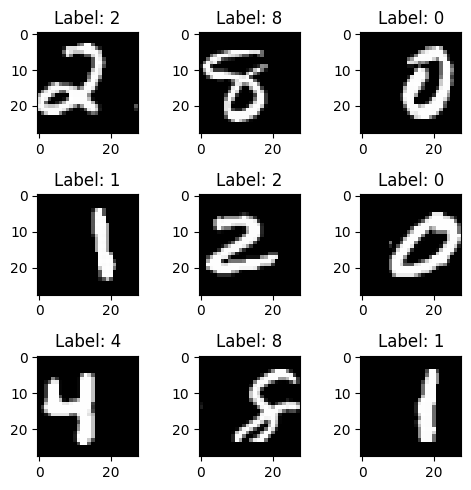

In [5]:
# Display random images in a grid
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    # Select a random index
    index = np.random.randint(0, X_train.shape[0])
    
    # Get the corresponding image and label
    image = X_train[index]
    label = y_train[index]
    
    # Display the image and label
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Run All shallow Classifiers on the shifted dataset
Display random images from the shifted training data in a grid.

Train Accuracy: 0.9983333333333333
Test Accuracy: 0.2
Scaled Train Accuracy: 1.0
Scaled Test Accuracy: 0.31
Min-Max Scaled Train Accuracy: 0.9866666666666667
Min-Max Scaled Test Accuracy: 0.3
KNN Train Accuracy: 0.8583333333333333
KNN Test Accuracy: 0.12
Scaled KNN Train Accuracy: 0.8483333333333334
Scaled KNN Test Accuracy: 0.15
Min-Max Scaled KNN Train Accuracy: 0.8566666666666667
Min-Max Scaled KNN Test Accuracy: 0.12
Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.14
Scaled Decision Tree Train Accuracy: 1.0
Scaled Decision Tree Test Accuracy: 0.11
Min-Max Scaled Decision Tree Train Accuracy: 1.0
Min-Max Scaled Decision Tree Test Accuracy: 0.19
Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.24
Scaled Random Forest Train Accuracy: 1.0
Scaled Random Forest Test Accuracy: 0.28
Min-Max Scaled Random Forest Train Accuracy: 1.0
Min-Max Scaled Random Forest Test Accuracy: 0.28
SVC Train Accuracy: 0.9866666666666667
SVC Test Accuracy: 0.2
Scaled SVC Train 

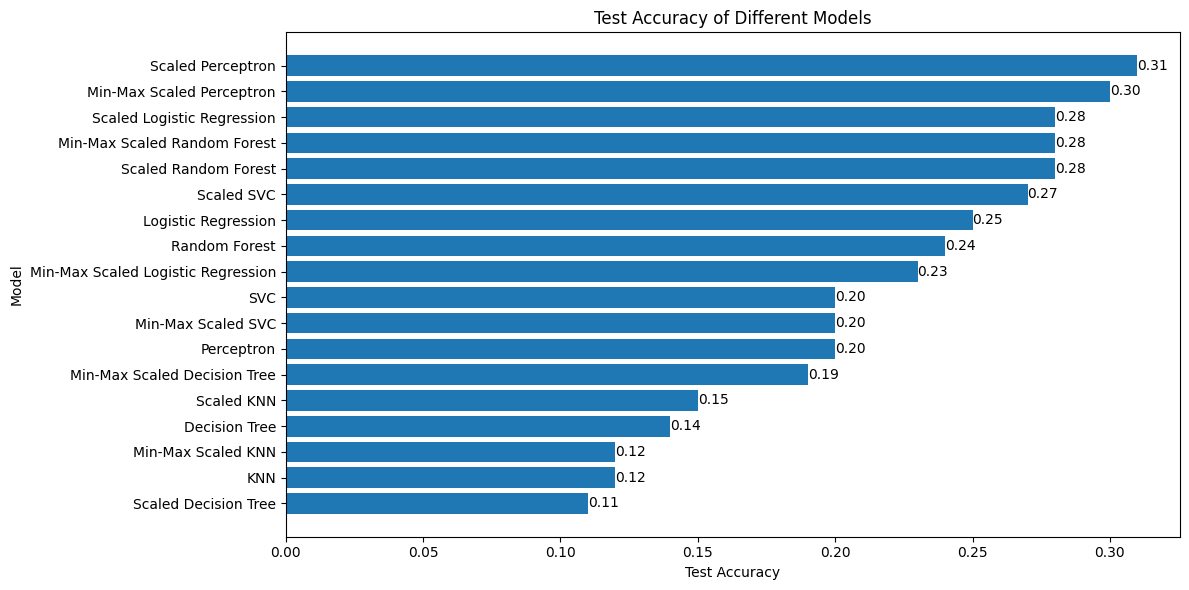

In [6]:

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Create and train the perceptron classifier
perceptron = Perceptron()
perceptron.fit(X_train_flat, y_train)

# Evaluate accuracy on the train set
train_accuracy = perceptron.score(X_train_flat, y_train)
print(f"Train Accuracy: {train_accuracy}")
# Evaluate accuracy on the test set
test_accuracy = perceptron.score(X_test_flat, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Create and train the perceptron classifier on scaled data
perceptron_scaled = Perceptron()
perceptron_scaled.fit(X_train_scaled, y_train)

# Evaluate accuracy on the train set using scaled data
train_accuracy_scaled = perceptron_scaled.score(X_train_scaled, y_train)
print(f"Scaled Train Accuracy: {train_accuracy_scaled}")

# Evaluate accuracy on the test set using scaled data
test_accuracy_scaled = perceptron_scaled.score(X_test_scaled, y_test)
print(f"Scaled Test Accuracy: {test_accuracy_scaled}")

# Min-max scaling
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply min-max scaling to the training data
X_train_mmscaled = scaler.fit_transform(X_train_flat)

# Apply min-max scaling to the test data
X_test_mmscaled = scaler.transform(X_test_flat)

# Create and train the perceptron classifier on min-max scaled data
perceptron_minmax = Perceptron()
perceptron_minmax.fit(X_train_mmscaled, y_train)

# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_minmax = perceptron_minmax.score(X_train_scaled, y_train)
print(f"Min-Max Scaled Train Accuracy: {train_accuracy_minmax}")

# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_minmax = perceptron_minmax.score(X_test_scaled, y_test)
print(f"Min-Max Scaled Test Accuracy: {test_accuracy_minmax}")


# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train_flat, y_train)
# Evaluate accuracy on the train set
train_accuracy_knn = knn.score(X_train_flat, y_train)
print(f"KNN Train Accuracy: {train_accuracy_knn}")
# Evaluate accuracy on the test set
test_accuracy_knn = knn.score(X_test_flat, y_test)
print(f"KNN Test Accuracy: {test_accuracy_knn}")

# Create and train the KNN classifier on scaled data
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
# Evaluate accuracy on the train set using scaled data
train_accuracy_knn_scaled = knn_scaled.score(X_train_scaled, y_train)
print(f"Scaled KNN Train Accuracy: {train_accuracy_knn_scaled}")
# Evaluate accuracy on the test set using scaled data
test_accuracy_knn_scaled = knn_scaled.score(X_test_scaled, y_test)
print(f"Scaled KNN Test Accuracy: {test_accuracy_knn_scaled}")

# Create and train the KNN classifier on min-max scaled data
knn_minmax = KNeighborsClassifier()
knn_minmax.fit(X_train_mmscaled, y_train)
# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_knn_minmax = knn_minmax.score(X_train_mmscaled, y_train)
print(f"Min-Max Scaled KNN Train Accuracy: {train_accuracy_knn_minmax}")
# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_knn_minmax = knn_minmax.score(X_test_mmscaled, y_test)
print(f"Min-Max Scaled KNN Test Accuracy: {test_accuracy_knn_minmax}")


# Create and train the decision tree classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_flat, y_train)
# Evaluate accuracy on the train set
train_accuracy_dt = decision_tree.score(X_train_flat, y_train)
print(f"Decision Tree Train Accuracy: {train_accuracy_dt}")
# Evaluate accuracy on the test set
test_accuracy_dt = decision_tree.score(X_test_flat, y_test)
print(f"Decision Tree Test Accuracy: {test_accuracy_dt}")

# Create and train the decision tree classifier on scaled data
decision_tree_scaled = DecisionTreeClassifier()
decision_tree_scaled.fit(X_train_scaled, y_train)
# Evaluate accuracy on the train set using scaled data
train_accuracy_dt_scaled = decision_tree_scaled.score(X_train_scaled, y_train)
print(f"Scaled Decision Tree Train Accuracy: {train_accuracy_dt_scaled}")
# Evaluate accuracy on the test set using scaled data
test_accuracy_dt_scaled = decision_tree_scaled.score(X_test_scaled, y_test)
print(f"Scaled Decision Tree Test Accuracy: {test_accuracy_dt_scaled}")

# Create and train the decision tree classifier on min-max scaled data
decision_tree_minmax = DecisionTreeClassifier()
decision_tree_minmax.fit(X_train_mmscaled, y_train)
# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_dt_minmax = decision_tree_minmax.score(X_train_mmscaled, y_train)
print(f"Min-Max Scaled Decision Tree Train Accuracy: {train_accuracy_dt_minmax}")
# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_dt_minmax = decision_tree_minmax.score(X_test_mmscaled, y_test)
print(f"Min-Max Scaled Decision Tree Test Accuracy: {test_accuracy_dt_minmax}")


# Create and train the random forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_flat, y_train)
# Evaluate accuracy on the train set
train_accuracy_rf = random_forest.score(X_train_flat, y_train)
print(f"Random Forest Train Accuracy: {train_accuracy_rf}")
# Evaluate accuracy on the test set
test_accuracy_rf = random_forest.score(X_test_flat, y_test)
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")

# Create and train the random forest classifier on scaled data
random_forest_scaled = RandomForestClassifier()
random_forest_scaled.fit(X_train_scaled, y_train)
# Evaluate accuracy on the train set using scaled data
train_accuracy_rf_scaled = random_forest_scaled.score(X_train_scaled, y_train)
print(f"Scaled Random Forest Train Accuracy: {train_accuracy_rf_scaled}")
# Evaluate accuracy on the test set using scaled data
test_accuracy_rf_scaled = random_forest_scaled.score(X_test_scaled, y_test)
print(f"Scaled Random Forest Test Accuracy: {test_accuracy_rf_scaled}")

# Create and train the random forest classifier on min-max scaled data
random_forest_minmax = RandomForestClassifier()
random_forest_minmax.fit(X_train_mmscaled, y_train)
# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_rf_minmax = random_forest_minmax.score(X_train_mmscaled, y_train)
print(f"Min-Max Scaled Random Forest Train Accuracy: {train_accuracy_rf_minmax}")
# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_rf_minmax = random_forest_minmax.score(X_test_mmscaled, y_test)
print(f"Min-Max Scaled Random Forest Test Accuracy: {test_accuracy_rf_minmax}")


# Create and train the support vector classifier
svc = SVC()
svc.fit(X_train_flat, y_train)
# Evaluate accuracy on the train set
train_accuracy_svc = svc.score(X_train_flat, y_train)
print(f"SVC Train Accuracy: {train_accuracy_svc}")
# Evaluate accuracy on the test set
test_accuracy_svc = svc.score(X_test_flat, y_test)
print(f"SVC Test Accuracy: {test_accuracy_svc}")

# Create and train the support vector classifier on scaled data
svc_scaled = SVC()
svc_scaled.fit(X_train_scaled, y_train)
# Evaluate accuracy on the train set using scaled data
train_accuracy_svc_scaled = svc_scaled.score(X_train_scaled, y_train)
print(f"Scaled SVC Train Accuracy: {train_accuracy_svc_scaled}")
# Evaluate accuracy on the test set using scaled data
test_accuracy_svc_scaled = svc_scaled.score(X_test_scaled, y_test)
print(f"Scaled SVC Test Accuracy: {test_accuracy_svc_scaled}")

# Create and train the support vector classifier on min-max scaled data
svc_minmax = SVC()
svc_minmax.fit(X_train_mmscaled, y_train)
# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_svc_minmax = svc_minmax.score(X_train_mmscaled, y_train)
print(f"Min-Max Scaled SVC Train Accuracy: {train_accuracy_svc_minmax}")
# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_svc_minmax = svc_minmax.score(X_test_mmscaled, y_test)
print(f"Min-Max Scaled SVC Test Accuracy: {test_accuracy_svc_minmax}")


# Create and train the logistic regression classifier
logistic_regression = LogisticRegression(max_iter=1000)  # Increase the number of iterations
logistic_regression.fit(X_train_flat, y_train)
# Evaluate accuracy on the train set
train_accuracy_lr = logistic_regression.score(X_train_flat, y_train)
print(f"Logistic Regression Train Accuracy: {train_accuracy_lr}")
# Evaluate accuracy on the test set
test_accuracy_lr = logistic_regression.score(X_test_flat, y_test)
print(f"Logistic Regression Test Accuracy: {test_accuracy_lr}")
# Create and train the logistic regression classifier on scaled data

logistic_regression_scaled = LogisticRegression(max_iter=1000)
logistic_regression_scaled.fit(X_train_scaled, y_train)
# Evaluate accuracy on the train set using scaled data
train_accuracy_lr_scaled = logistic_regression_scaled.score(X_train_scaled, y_train)
print(f"Scaled Logistic Regression Train Accuracy: {train_accuracy_lr_scaled}")
# Evaluate accuracy on the test set using scaled data
test_accuracy_lr_scaled = logistic_regression_scaled.score(X_test_scaled, y_test)
print(f"Scaled Logistic Regression Test Accuracy: {test_accuracy_lr_scaled}")
# Create and train the logistic regression classifier on min-max scaled data

logistic_regression_minmax = LogisticRegression(max_iter=1000)
logistic_regression_minmax.fit(X_train_mmscaled, y_train)
# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_lr_minmax = logistic_regression_minmax.score(X_train_mmscaled, y_train)
print(f"Min-Max Scaled Logistic Regression Train Accuracy: {train_accuracy_lr_minmax}")
# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_lr_minmax = logistic_regression_minmax.score(X_test_mmscaled, y_test)
print(f"Min-Max Scaled Logistic Regression Test Accuracy: {test_accuracy_lr_minmax}")


# Create a dictionary to store the accuracies
accuracies = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

# Add accuracies for each model to the dictionary
accuracies['Model'].extend(['Perceptron', 'Scaled Perceptron', 'Min-Max Scaled Perceptron',
                            'KNN', 'Scaled KNN', 'Min-Max Scaled KNN',
                            'Decision Tree', 'Scaled Decision Tree', 'Min-Max Scaled Decision Tree',
                            'Random Forest', 'Scaled Random Forest', 'Min-Max Scaled Random Forest',
                            'SVC', 'Scaled SVC', 'Min-Max Scaled SVC',
                            'Logistic Regression', 'Scaled Logistic Regression', 'Min-Max Scaled Logistic Regression'])
accuracies['Train Accuracy'].extend([train_accuracy, train_accuracy_scaled, train_accuracy_minmax,
                                     train_accuracy_knn, train_accuracy_knn_scaled, train_accuracy_knn_minmax,
                                     train_accuracy_dt, train_accuracy_dt_scaled, train_accuracy_dt_minmax,
                                     train_accuracy_rf, train_accuracy_rf_scaled, train_accuracy_rf_minmax,
                                     train_accuracy_svc, train_accuracy_svc_scaled, train_accuracy_svc_minmax,
                                     train_accuracy_lr, train_accuracy_lr_scaled, train_accuracy_lr_minmax])
accuracies['Test Accuracy'].extend([test_accuracy, test_accuracy_scaled, test_accuracy_minmax,
                                    test_accuracy_knn, test_accuracy_knn_scaled, test_accuracy_knn_minmax,
                                    test_accuracy_dt, test_accuracy_dt_scaled, test_accuracy_dt_minmax,
                                    test_accuracy_rf, test_accuracy_rf_scaled, test_accuracy_rf_minmax,
                                    test_accuracy_svc, test_accuracy_svc_scaled, test_accuracy_svc_minmax,
                                    test_accuracy_lr, test_accuracy_lr_scaled, test_accuracy_lr_minmax])

# Create a pandas DataFrame from the accuracies dictionary
df = pd.DataFrame(accuracies)

# Print the DataFrame
df

df.sort_values(by='Test Accuracy', ascending=False)

# Plot the accuracies in descending order
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values(by='Test Accuracy', ascending=False)
plt.barh(df_sorted['Model'], df_sorted['Test Accuracy'])
plt.xlabel('Test Accuracy')
plt.ylabel('Model')
plt.title('Test Accuracy of Different Models')

# Annotate the values
for i, acc in enumerate(df_sorted['Test Accuracy']):
    plt.annotate(f"{acc:.2f}", (acc, i), ha='left', va='center')

# Show the plot
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
